# penguins_pytorch_classification

In [1]:
import sklearn.datasets
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = sns.load_dataset('penguins')

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
df.shape

(344, 7)

In [6]:
df.dropna(inplace=True)


In [7]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
df.shape

(333, 7)

In [9]:
print(df.island.unique())
print(df.body_mass_g.unique())
print(df.sex.unique())
print(df.species.unique())

['Torgersen' 'Biscoe' 'Dream']
[3750. 3800. 3250. 3450. 3650. 3625. 4675. 3200. 4400. 3700. 4500. 3325.
 4200. 3400. 3600. 3950. 3550. 3150. 3900. 3300. 4150. 4650. 3100. 3000.
 4600. 3425. 3500. 4300. 4050. 2900. 2850. 3350. 4100. 3050. 4450. 4250.
 4000. 4700. 4350. 3725. 4725. 3075. 2925. 3175. 4775. 3825. 4275. 4075.
 3775. 3875. 3275. 4475. 3975. 3475. 3525. 3575. 4550. 3850. 4800. 2700.
 3675. 5700. 5400. 5200. 5150. 5550. 5850. 6300. 5350. 5000. 5050. 5100.
 5650. 5250. 6050. 4950. 4750. 4900. 5300. 4850. 5800. 6000. 5950. 4625.
 5450. 5600. 4875. 4925. 4975. 5500. 4575. 4375. 5750.]
['MALE' 'FEMALE']
['Adelie' 'Chinstrap' 'Gentoo']


In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

dfi = df.copy()

dfi['island'] = label_encoder.fit_transform(dfi['island'])
print(label_encoder.classes_)
dfi['body_mass_g'] = label_encoder.fit_transform(dfi['body_mass_g'])
print(label_encoder.classes_)
dfi['sex'] = label_encoder.fit_transform(dfi['sex'])
print(label_encoder.classes_)
dfi['species'] = label_encoder.fit_transform(dfi['species'])
print(label_encoder.classes_)

['Biscoe' 'Dream' 'Torgersen']
[2700. 2850. 2900. 2925. 3000. 3050. 3075. 3100. 3150. 3175. 3200. 3250.
 3275. 3300. 3325. 3350. 3400. 3425. 3450. 3475. 3500. 3525. 3550. 3575.
 3600. 3625. 3650. 3675. 3700. 3725. 3750. 3775. 3800. 3825. 3850. 3875.
 3900. 3950. 3975. 4000. 4050. 4075. 4100. 4150. 4200. 4250. 4275. 4300.
 4350. 4375. 4400. 4450. 4475. 4500. 4550. 4575. 4600. 4625. 4650. 4675.
 4700. 4725. 4750. 4775. 4800. 4850. 4875. 4900. 4925. 4950. 4975. 5000.
 5050. 5100. 5150. 5200. 5250. 5300. 5350. 5400. 5450. 5500. 5550. 5600.
 5650. 5700. 5750. 5800. 5850. 5950. 6000. 6050. 6300.]
['FEMALE' 'MALE']
['Adelie' 'Chinstrap' 'Gentoo']


In [11]:
dfi.describe()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.918919,0.651652,43.992793,17.164865,200.966967,43.048048,0.504505
std,0.889718,0.714715,5.468668,1.969235,14.015765,24.691789,0.500732
min,0.000000,0.000000,32.100000,13.100000,172.000000,0.000000,0.000000
25%,0.000000,0.000000,39.500000,15.600000,190.000000,22.000000,0.000000
50%,1.000000,1.000000,44.500000,17.300000,197.000000,40.000000,1.000000
75%,2.000000,1.000000,48.600000,18.700000,213.000000,63.000000,1.000000
max,2.000000,2.000000,59.600000,21.500000,231.000000,92.000000,1.000000


In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils

In [13]:
class PenguinsModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(PenguinsModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 16),
            nn.ReLU(),
            nn.Linear(16, output_size)
        )
        
    def forward(self, x):
        output = self.model(x)
        result = F.softmax(output, dim = 1)
        with torch.no_grad():
            value = torch.argmax(result, dim = 1)
        return output, value

In [14]:
X_data = dfi[['island', 'bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'sex']].values
y_data = dfi['species'].values

In [15]:
X_data = torch.Tensor(X_data)
y_data = torch.LongTensor(y_data)

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2) # train과 test를 8:2로 분할

In [17]:
model = PenguinsModel(6, 3)  # 입력은 6, 출력은 3종류의 확률

In [18]:
with torch.no_grad():
    y, _ = model(torch.unsqueeze(X_train[0], dim=0))
    print(y)
    print(F.softmax(y))
    print(F.softmax(y).sum())
    print(np.argmax(y), y_train[0])

tensor([[-24.8952,  57.1240,  19.5330]])
tensor([[2.3963e-36, 1.0000e+00, 4.7256e-17]])
tensor(1.)
tensor(1) tensor(1)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """


In [19]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [20]:
print(model)

PenguinsModel(
  (model): Sequential(
    (0): Linear(in_features=6, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=3, bias=True)
  )
)


In [21]:
model = PenguinsModel(6, 3)  
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)
criterion = nn.CrossEntropyLoss()

n_epochs = 5000 # 10000회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    model.train()
    y, _ = model(X_train)
    target = y_train.squeeze(dim=-1)
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        model.eval()
        y_pred, _ = model(X_test)
        test_loss = criterion(y_pred, y_test.squeeze(dim=-1)).sum()
        print('epoch {}th training loss: {} test loss: {}'.format(epoch, loss.data, test_loss.data))
        list_training_loss.append(loss.data)
        list_test_loss.append(test_loss.data)

epoch 0th training loss: 24.206493377685547 test loss: 23.184907913208008
epoch 1000th training loss: 0.0878116637468338 test loss: 0.08976613730192184
epoch 2000th training loss: 0.041688449680805206 test loss: 0.04111509397625923
epoch 3000th training loss: 0.027383727952837944 test loss: 0.026700759306550026
epoch 4000th training loss: 0.0173586867749691 test loss: 0.016988178715109825


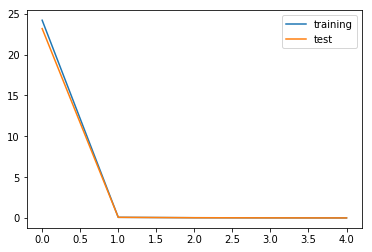

In [22]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import accuracy_score

with torch.no_grad():
    _ , y_pred = model(X_test)
    score = accuracy_score(y_test, y_pred)
    print(score)

1.0
